In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


/Users/renaud/anaconda3/envs/MasterElKaroui/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# Pré-processing des données

In [2]:
# xls = pd.ExcelFile('CAC.xlsx')
# df1 = pd.read_excel(xls, 'Worksheet', usecols=[0,1,2])
# valeurs=[i for i in range(124) if i%3==1]
# df_temp = pd.read_excel(xls, 'Data', parse_dates=True).dropna(axis=1,how='all')
# Date=df_temp["CAC Index"][1:].rename("Date")
# df2=pd.read_excel(xls, 'Data', parse_dates=True, usecols=valeurs,skiprows=1).set_index(Date)

In [3]:
xls = pd.ExcelFile('cac40.xls')
df_brut1 = pd.read_excel(xls, 'Poids', usecols=[0,2])
df_brut2 = pd.read_excel(xls, 'Données quotidiennes', parse_dates=True).dropna(axis=1,how='all')


## Aperçu des données brutes

In [4]:
df_brut1.head()

,Valeurs,Poids dans l'indice
0,Accor SA,0.007442
1,Air Liquide SA,0.033058
2,Alcatel-Lucent/France,0.007738
3,Alstom SA,0.014156
4,ArcelorMittal,0.037576


In [5]:
df_brut2.head()

,Date,CAC 40,Accor SA,Air Liquide,Alcatel-Lucent,Alstom,Arcelor Mittal,AXA SA,BNP Paribas,Bouygues,...,Societe Generale,STMicroelectronics NV,Suez SA,Total SA,Unibail-Rodamco,Vallourec,Veolia Environnement,Vinci SA,Vivendi,Tecnip
0,2001-01-02,5798.90,40.6441,51.4233,57.50,243.4292,2.75,37.6608,46.2384,41.0608,...,61.0437,42.59,NaN,39.0814,44.4303,10.8684,45.2226,16.4820,68.0,35.6527
1,2001-01-03,5684.05,41.0413,51.0560,54.50,247.4619,2.84,37.1290,45.3454,40.2027,...,60.4393,40.10,NaN,38.7113,44.6932,10.5093,45.2226,16.0770,67.5,36.8572
2,2001-01-04,5815.99,43.2919,52.4251,62.30,244.7124,3.20,37.0565,46.9330,45.9092,...,65.0885,45.20,NaN,37.9218,44.4303,10.5772,40.9435,15.4634,70.6,34.8818
3,2001-01-05,5758.02,44.0674,52.7590,61.65,241.8711,3.10,35.7270,47.4539,46.3383,...,65.0885,44.25,NaN,37.9958,44.7195,10.4802,41.5756,16.2979,70.7,35.8936
4,2001-01-08,5732.80,44.5402,53.3934,61.45,229.1314,3.10,35.3161,47.1314,43.7639,...,66.7622,43.40,NaN,38.4646,44.9298,10.6258,42.6940,15.7947,70.1,36.5922


In [6]:
df_brut2.set_index(["Date"], inplace=True)

## Analyse de la seconde feuille ("Données quotidiennes")

In [7]:
import ydata_profiling

In [8]:
df_brut2.isna().mean().sort_values(ascending=False).head()

Suez SA                  0.822204
Electricite de France    0.531302
Gaz de France SA         0.491235
Credit Agricole SA       0.103088
Schneider Electric SA    0.000000
dtype: float64

In [9]:
# Calculer le pourcentage de valeurs manquantes
nb_na = df_brut2.isna().mean().sort_index(ascending=True) * 100

# Récupérer les noms des colonnes avec plus de 40% de valeurs manquantes
colonnes_a_supprimer = nb_na[nb_na > 40].index.tolist()

# Afficher les colonnes à supprimer
print(f"Colonnes à supprimer (>40% de NaN) : {colonnes_a_supprimer}")

# Supprimer ces colonnes du DataFrame
df_brut2_60 = df_brut2.drop(columns=colonnes_a_supprimer)

# Afficher confirmation
print(f"Colonnes restantes : {df_brut2.columns.tolist()}")
df_brut2_60

Colonnes à supprimer (>40% de NaN) : ['Electricite de France', 'Gaz de France SA', 'Suez SA']
Colonnes restantes : ['CAC 40', 'Accor SA', 'Air Liquide', 'Alcatel-Lucent', 'Alstom', 'Arcelor Mittal', 'AXA SA', 'BNP Paribas', 'Bouygues', 'Cap Gemini SA', 'Carrefour SA', 'Credit Agricole SA', 'Groupe Danone', 'Dexia SA', 'EADS', 'Electricite de France', 'Essilor International SA', 'France Telecom SA', 'Gaz de France SA', "L'Oreal SA", 'Lafarge SA', 'Lagardere SCA', 'LVMH Moet Hennessy Louis Vuitton SA', 'Michelin', 'Pernod-Ricard SA', 'Peugeot SA', 'PPR', 'Renault SA', 'Cie de Saint-Gobain', 'Sanofi-Aventis SA', 'Schneider Electric SA', 'Societe Generale', 'STMicroelectronics NV', 'Suez SA', 'Total SA', 'Unibail-Rodamco', 'Vallourec', 'Veolia Environnement', 'Vinci SA', 'Vivendi', 'Tecnip']


,CAC 40,Accor SA,Air Liquide,Alcatel-Lucent,Alstom,Arcelor Mittal,AXA SA,BNP Paribas,Bouygues,Cap Gemini SA,...,Schneider Electric SA,Societe Generale,STMicroelectronics NV,Total SA,Unibail-Rodamco,Vallourec,Veolia Environnement,Vinci SA,Vivendi,Tecnip
Date,,,,,,,,,,,,,,,,,,,,,
2001-01-02,5798.90,40.6441,51.4233,57.500,243.4292,2.750,37.6608,46.2384,41.0608,168.500,...,73.5835,61.0437,42.590,39.0814,44.4303,10.8684,45.2226,16.4820,68.000,35.6527
2001-01-03,5684.05,41.0413,51.0560,54.500,247.4619,2.840,37.1290,45.3454,40.2027,158.000,...,72.8110,60.4393,40.100,38.7113,44.6932,10.5093,45.2226,16.0770,67.500,36.8572
2001-01-04,5815.99,43.2919,52.4251,62.300,244.7124,3.200,37.0565,46.9330,45.9092,166.000,...,72.4247,65.0885,45.200,37.9218,44.4303,10.5772,40.9435,15.4634,70.600,34.8818
2001-01-05,5758.02,44.0674,52.7590,61.650,241.8711,3.100,35.7270,47.4539,46.3383,166.900,...,71.0245,65.0885,44.250,37.9958,44.7195,10.4802,41.5756,16.2979,70.700,35.8936
2001-01-08,5732.80,44.5402,53.3934,61.450,229.1314,3.100,35.3161,47.1314,43.7639,166.900,...,73.8732,66.7622,43.400,38.4646,44.9298,10.6258,42.6940,15.7947,70.100,36.5922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010-03-03,3842.52,39.6750,88.9400,2.377,49.0800,29.950,15.1950,54.8500,37.5300,35.385,...,81.5800,42.8600,6.635,41.7600,152.3000,144.7000,25.2150,40.1650,19.155,54.9300
2010-03-04,3828.41,39.1050,88.4400,2.424,48.7200,29.765,15.1350,54.7700,37.1850,35.235,...,81.2900,42.8800,6.590,41.5500,153.4500,144.1500,25.0050,41.2200,19.185,54.4000
2010-03-05,3910.42,39.4950,90.0000,2.511,49.4500,30.910,15.6150,56.7800,37.6150,35.850,...,82.4700,44.9500,6.806,42.4100,155.7000,145.7500,23.9400,41.9000,19.350,54.9900


Entreprises pour lesquelles il manque un pourcentage de données non négligeable

In [10]:

df_brut2_60.isna().mean().sort_values(ascending=False).head(6)

Credit Agricole SA       0.103088
CAC 40                   0.000000
Schneider Electric SA    0.000000
Pernod-Ricard SA         0.000000
Peugeot SA               0.000000
PPR                      0.000000
dtype: float64

In [11]:
# Identifier les lignes sans NaN pour toutes les colonnes
plage_sans_nan = df_brut2_60.dropna()

# Si la DataFrame n'est pas vide, récupérer la plage de dates
if not plage_sans_nan.empty:
    date_debut = plage_sans_nan.index.min()
    date_fin = plage_sans_nan.index.max()
    print(f"Plage de dates sans NaN pour toutes les colonnes : de {date_debut} à {date_fin}")
else:
    print("Aucune plage continue sans NaN n'a été trouvée.")


Plage de dates sans NaN pour toutes les colonnes : de 2001-12-13 00:00:00 à 2010-03-09 00:00:00


# Etude des données de la période 22/06/2001 à 16/11/2010


In [12]:

df=plage_sans_nan
df.isna().mean().sort_values(ascending=False)

CAC 40                                 0.0
Schneider Electric SA                  0.0
Michelin                               0.0
Pernod-Ricard SA                       0.0
Peugeot SA                             0.0
PPR                                    0.0
Renault SA                             0.0
Cie de Saint-Gobain                    0.0
Sanofi-Aventis SA                      0.0
Societe Generale                       0.0
Accor SA                               0.0
STMicroelectronics NV                  0.0
Total SA                               0.0
Unibail-Rodamco                        0.0
Vallourec                              0.0
Veolia Environnement                   0.0
Vinci SA                               0.0
Vivendi                                0.0
LVMH Moet Hennessy Louis Vuitton SA    0.0
Lagardere SCA                          0.0
Lafarge SA                             0.0
L'Oreal SA                             0.0
Air Liquide                            0.0
Alcatel-Luc

### Extraction de la valeur de l'indice

In [13]:
cac_value=df["CAC 40"]
#df.drop(columns='CAC 40', inplace=True)

### Rendements et Log-rendements

In [14]:
returns = df.astype(float).pct_change().dropna()
returns.head()

,CAC 40,Accor SA,Air Liquide,Alcatel-Lucent,Alstom,Arcelor Mittal,AXA SA,BNP Paribas,Bouygues,Cap Gemini SA,...,Schneider Electric SA,Societe Generale,STMicroelectronics NV,Total SA,Unibail-Rodamco,Vallourec,Veolia Environnement,Vinci SA,Vivendi,Tecnip
Date,,,,,,,,,,,,,,,,,,,,,
2001-12-14,-0.016016,-0.004102,-0.014887,-0.041432,0.008581,0.032787,-0.029410,-0.009794,0.005004,0.003891,...,-0.007548,-0.016530,0.009302,-0.010331,-0.002678,-0.011295,0.020706,0.005627,-0.015582,0.026986
2001-12-17,0.033445,0.016992,0.010511,0.055496,0.027842,-0.047619,0.025977,0.034357,-0.003931,0.068475,...,-0.004753,0.044538,0.049251,0.040361,0.000000,0.026666,-0.014752,0.011991,0.067970,0.030658
2001-12-18,-0.001130,-0.002530,0.007802,-0.023761,-0.004515,0.027778,-0.063293,0.003524,0.001843,0.002418,...,0.051576,-0.006437,-0.002196,0.007358,-0.004475,0.009273,-0.004011,-0.018961,0.037489,0.002126
2001-12-19,-0.002719,-0.018275,-0.006451,-0.010875,-0.029478,0.000000,0.029280,-0.001506,-0.014975,-0.034982,...,-0.002726,-0.007287,-0.011004,0.001327,-0.009892,-0.007350,-0.014765,0.025770,-0.008403,0.000000
2001-12-20,-0.009221,0.027145,-0.007792,-0.057592,-0.065420,0.032432,-0.003503,-0.007532,-0.033332,-0.011875,...,-0.050092,-0.018760,-0.049235,0.007958,0.008174,-0.027776,0.004088,0.001567,-0.012712,0.010599


### Test de stationnarité

In [15]:
log_returns = np.log(df.astype(float)).diff().dropna()
log_returns.head()
returns=log_returns

In [16]:
from statsmodels.tsa.stattools import adfuller

### Pour les rendements

In [17]:
from statsmodels.tsa.stattools import adfuller

# Initialisation du compteur pour les séries non stationnaires
non_stationary_count = 0

# Boucle sur chaque colonne pour appliquer le test ADF
for i in range(returns.shape[1]):
    col_name = returns.columns[i]
    series = returns.iloc[:, i]

    result = adfuller(series)
    p_value = result[1]

    print(f"{col_name}: p-value = {p_value:.4f}")

    if p_value < 0.01:
        print(f" → La série '{col_name}' est stationnaire (p < 0.01)")
    else:
        print(f" → La série '{col_name}' n'est pas stationnaire (p ≥ 0.01)")
        non_stationary_count += 1

    print("-" * 50)

# Affichage du nombre de séries non stationnaires
print(f"\nNombre de vecteurs non stationnaires : {non_stationary_count} / {returns.shape[1]}")


CAC 40: p-value = 0.0000
 → La série 'CAC 40' est stationnaire (p < 0.01)
--------------------------------------------------
Accor SA: p-value = 0.0000
 → La série 'Accor SA' est stationnaire (p < 0.01)
--------------------------------------------------
Air Liquide: p-value = 0.0000
 → La série 'Air Liquide' est stationnaire (p < 0.01)
--------------------------------------------------
Alcatel-Lucent: p-value = 0.0000
 → La série 'Alcatel-Lucent' est stationnaire (p < 0.01)
--------------------------------------------------
Alstom: p-value = 0.0000
 → La série 'Alstom' est stationnaire (p < 0.01)
--------------------------------------------------
Arcelor Mittal: p-value = 0.0000
 → La série 'Arcelor Mittal' est stationnaire (p < 0.01)
--------------------------------------------------
AXA SA: p-value = 0.0000
 → La série 'AXA SA' est stationnaire (p < 0.01)
--------------------------------------------------
BNP Paribas: p-value = 0.0000
 → La série 'BNP Paribas' est stationnaire (p < 0

Sur la base des p-valeurs, qui sont toutes inférieures à 1%, nous pouvons conclure que nous pouvons rejeter l'hypothèse nulle selon laquelle les données ne sont pas stationnaires, avec un niveau de confiance de 99%.

In [18]:
from statsmodels.tsa.stattools import kpss

# Initialisation du compteur pour les séries non stationnaires
non_stationary_count = 0

# Boucle sur chaque colonne pour appliquer le test ADF
for i in range(returns.shape[1]):
    col_name = returns.columns[i]
    series = returns.iloc[:, i]

    result = kpss(series, regression='c')
    p_value = result[1]

    print(f"{col_name}: p-value = {p_value:.4f}")

    if p_value > 0.01:
        print(f" → La série '{col_name}' est stationnaire (p >= 0.01)")
    else:
        print(f" → La série '{col_name}' n'est pas stationnaire (p < 0.01)")
        non_stationary_count += 1

    print("-" * 50)

# Affichage du nombre de séries non stationnaires
print(f"\nNombre de vecteurs non stationnaires : {non_stationary_count} / {returns.shape[1]}")


CAC 40: p-value = 0.1000
 → La série 'CAC 40' est stationnaire (p >= 0.01)
--------------------------------------------------
Accor SA: p-value = 0.1000
 → La série 'Accor SA' est stationnaire (p >= 0.01)
--------------------------------------------------
Air Liquide: p-value = 0.1000
 → La série 'Air Liquide' est stationnaire (p >= 0.01)
--------------------------------------------------
Alcatel-Lucent: p-value = 0.1000
 → La série 'Alcatel-Lucent' est stationnaire (p >= 0.01)
--------------------------------------------------
Alstom: p-value = 0.1000
 → La série 'Alstom' est stationnaire (p >= 0.01)
--------------------------------------------------
Arcelor Mittal: p-value = 0.0919
 → La série 'Arcelor Mittal' est stationnaire (p >= 0.01)
--------------------------------------------------
AXA SA: p-value = 0.1000
 → La série 'AXA SA' est stationnaire (p >= 0.01)
--------------------------------------------------
BNP Paribas: p-value = 0.1000
 → La série 'BNP Paribas' est stationnaire

/var/folders/gh/8sgjg9tj54v1mgxh73dkqv_h0000gn/T/ipykernel_48305/1608798460.py:11: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(series, regression='c')
/var/folders/gh/8sgjg9tj54v1mgxh73dkqv_h0000gn/T/ipykernel_48305/1608798460.py:11: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(series, regression='c')
/var/folders/gh/8sgjg9tj54v1mgxh73dkqv_h0000gn/T/ipykernel_48305/1608798460.py:11: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(series, regression='c')
/var/folders/gh/8sgjg9tj54v1mgxh73dkqv_h0000gn/T/ipykernel_48305/1608798460.py:11: InterpolationWarning: The test statistic is out

Sur la base des p-valeurs, qui sont toutes supérieur à 1%, nous pouvons conclure que nous ne pouvons pas rejeter l'hypothèse nulle selon laquelle les données sont stationnaires, avec un niveau de confiance de 99%.

### Normalisation

In [19]:
print("Moyenne :")
print(returns.mean())


Moyenne :
CAC 40                                -0.000057
Accor SA                               0.000027
Air Liquide                            0.000253
Alcatel-Lucent                        -0.000959
Alstom                                -0.000401
Arcelor Mittal                         0.001320
AXA SA                                -0.000178
BNP Paribas                            0.000077
Bouygues                               0.000060
Cap Gemini SA                         -0.000357
Carrefour SA                          -0.000214
Credit Agricole SA                    -0.000123
Groupe Danone                          0.000150
Dexia SA                              -0.000591
EADS                                   0.000065
Essilor International SA               0.000480
France Telecom SA                     -0.000353
L'Oreal SA                             0.000012
Lafarge SA                            -0.000292
Lagardere SCA                         -0.000189
LVMH Moet Hennessy Louis Vuitt

In [20]:
print("Ecart-type :")
print(returns.std())

Ecart-type :
CAC 40                                 0.015574
Accor SA                               0.020812
Air Liquide                            0.016659
Alcatel-Lucent                         0.034349
Alstom                                 0.040744
Arcelor Mittal                         0.034921
AXA SA                                 0.029626
BNP Paribas                            0.025019
Bouygues                               0.022562
Cap Gemini SA                          0.028091
Carrefour SA                           0.019018
Credit Agricole SA                     0.025622
Groupe Danone                          0.015074
Dexia SA                               0.030907
EADS                                   0.026339
Essilor International SA               0.015524
France Telecom SA                      0.025039
L'Oreal SA                             0.016998
Lafarge SA                             0.022904
Lagardere SCA                          0.019436
LVMH Moet Hennessy Louis Vu

### Test de distribution gaussienne

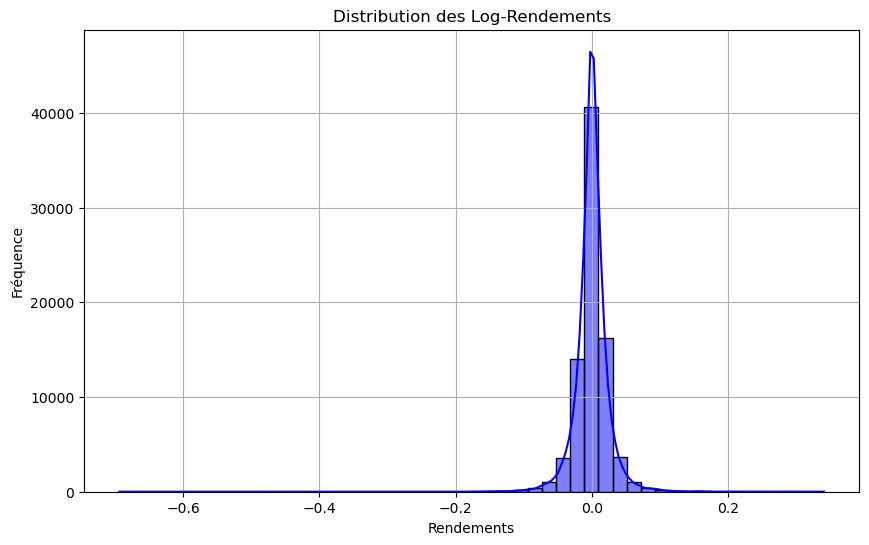

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Tracer l'histogramme des rendements
plt.figure(figsize=(10,6))
sns.histplot(returns[0:].values.flatten(), bins=50, kde=True, color="blue")  # Histogramme avec densité

# Labels et titre
plt.xlabel("Rendements")
plt.ylabel("Fréquence")
plt.title("Distribution des Log-Rendements")
plt.grid(True)

plt.show()


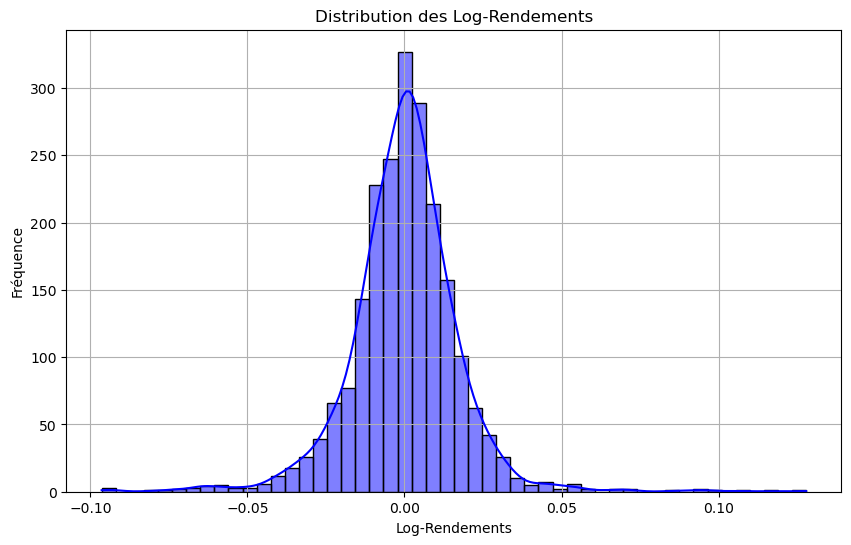

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Tracer l'histogramme des rendements
plt.figure(figsize=(10,6))
sns.histplot(returns["Total SA"].values, bins=50, kde=True, color="blue")  # Histogramme avec densité

# Labels et titre
plt.xlabel("Log-Rendements")
plt.ylabel("Fréquence")
plt.title("Distribution des Log-Rendements")
plt.grid(True)

plt.show()


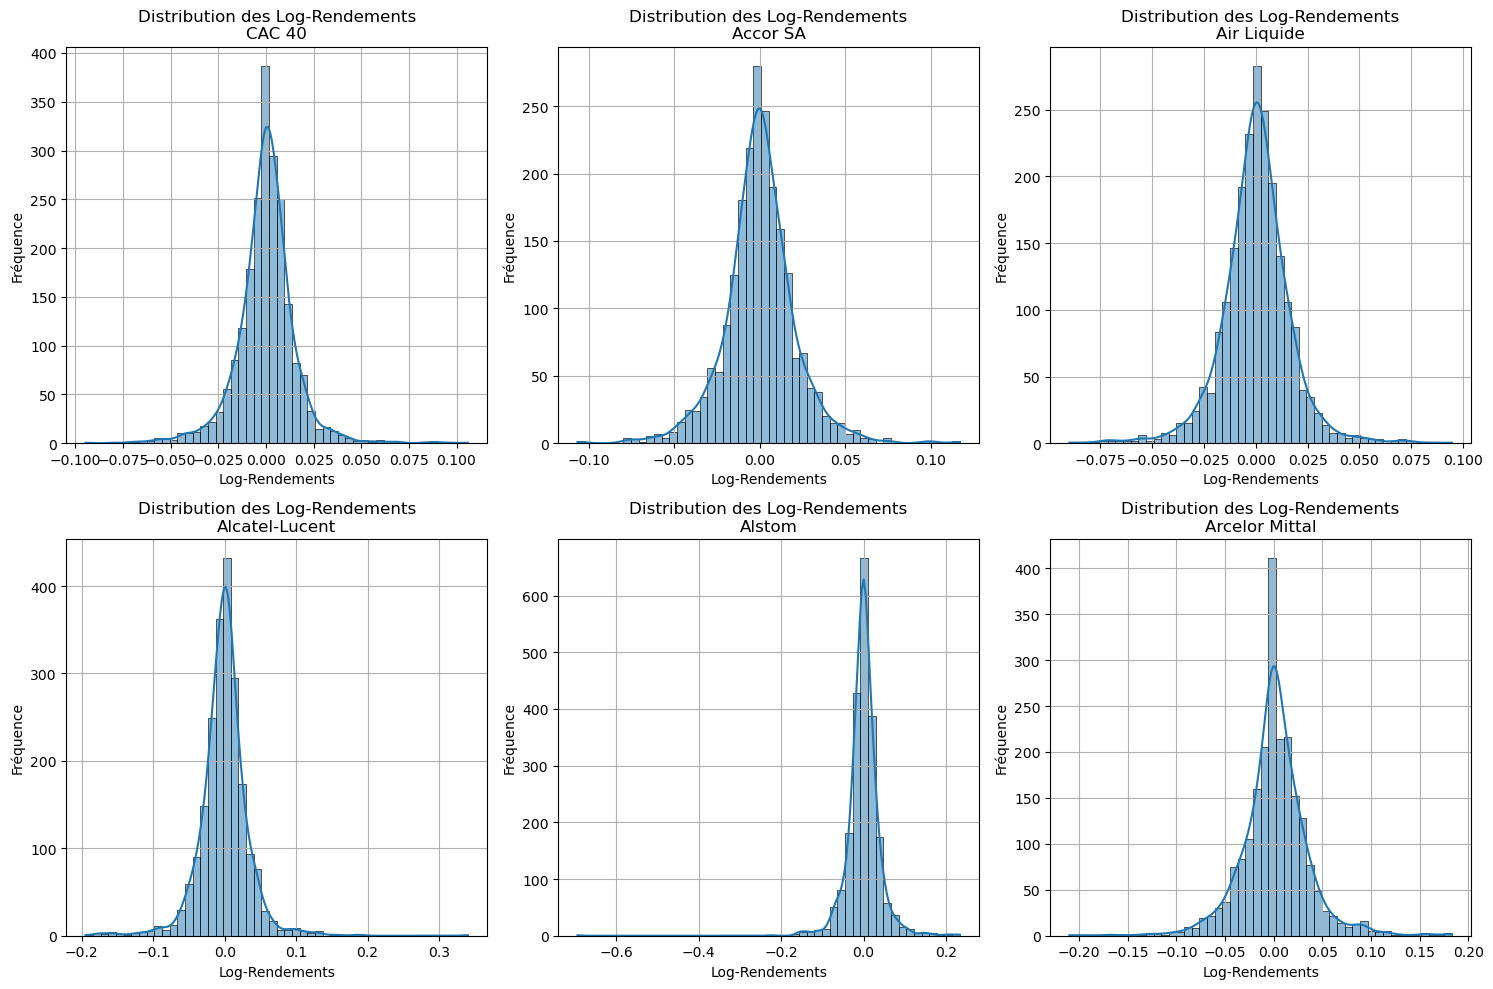

,Kolmogorov-Smirnov p-value,Shapiro-Wilk p-value
CAC 40,3.620500e-13,5.617661e-32
Accor SA,2.812664e-08,1.221368e-23
Air Liquide,9.296587e-08,2.013160e-26
Alcatel-Lucent,3.928113e-14,6.148139e-35
Alstom,2.257706e-19,2.927312e-42
Arcelor Mittal,4.713975e-12,1.705932e-29


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kstest, shapiro
import pandas as pd

# Tracer les histogrammes des 6 premières colonnes
colonnes = returns.columns[:6]

plt.figure(figsize=(15, 10))

for i, col in enumerate(colonnes, 1):
    plt.subplot(2, 3, i)
    sns.histplot(returns[col].dropna(), bins=50, kde=True)
    plt.title(f"Distribution des Log-Rendements\n{col}")
    plt.xlabel("Log-Rendements")
    plt.ylabel("Fréquence")
    plt.grid(True)

plt.tight_layout()
plt.show()

# Test de Kolmogorov-Smirnov et de Shapiro-Wilk
ks_pvalues = {}
shapiro_pvalues = {}

for col in colonnes:
    data = returns[col].dropna()
    ks_stat, ks_pval = kstest(data, 'norm', args=(data.mean(), data.std()))
    shapiro_stat, shapiro_pval = shapiro(data)
    
    ks_pvalues[col] = ks_pval
    shapiro_pvalues[col] = shapiro_pval

# Afficher les p-values sous forme de DataFrame
pvalues_df = pd.DataFrame({
    'Kolmogorov-Smirnov p-value': ks_pvalues,
    'Shapiro-Wilk p-value': shapiro_pvalues
})

pvalues_df

In [24]:
from sklearn.preprocessing import StandardScaler

#Initialisation du scaler
scaler = StandardScaler()

#Normalisation des données
normalized_returns = pd.DataFrame(scaler.fit_transform(returns), columns=returns.columns, index=returns.index)

#Affichage des données normalisées
normalized_returns.head()


,CAC 40,Accor SA,Air Liquide,Alcatel-Lucent,Alstom,Arcelor Mittal,AXA SA,BNP Paribas,Bouygues,Cap Gemini SA,...,Schneider Electric SA,Societe Generale,STMicroelectronics NV,Total SA,Unibail-Rodamco,Vallourec,Veolia Environnement,Vinci SA,Vivendi,Tecnip
Date,,,,,,,,,,,,,,,,,,,,,
2001-12-14,-1.033267,-0.198882,-0.915744,-1.204271,0.219582,0.886253,-1.001849,-0.396537,0.218641,0.150999,...,-0.367350,-0.625132,0.412923,-0.600707,-0.186794,-0.482874,0.946256,0.264352,-0.571082,0.996962
2001-12-17,2.116443,0.808487,0.612624,1.600680,0.683998,-1.435297,0.871853,1.347452,-0.177271,2.371031,...,-0.234864,1.650562,2.012943,2.266865,-0.032952,0.963041,-0.670354,0.588573,2.485247,1.131888
2001-12-18,-0.068990,-0.123052,0.451455,-0.672354,-0.101264,0.746993,-2.201536,0.137578,0.078989,0.098727,...,2.358417,-0.239441,-0.059355,0.416265,-0.290190,0.307298,-0.174599,-1.007732,1.398882,0.070689
2001-12-19,-0.171193,-0.887748,-0.403805,-0.290499,-0.724706,-0.037797,0.980381,-0.063327,-0.671524,-1.255165,...,-0.139035,-0.271765,-0.424833,0.071543,-0.603204,-0.330051,-0.670976,1.283551,-0.298488,-0.009571
2001-12-20,-0.591324,1.285916,-0.484895,-1.699345,-1.651123,0.876421,-0.112471,-0.305335,-1.505513,-0.412635,...,-2.431144,-0.710882,-2.049827,0.450472,0.434004,-1.128009,0.195704,0.056484,-0.461856,0.388975


In [25]:
from scipy.stats import shapiro

# Initialisation du compteur pour les séries non normales
non_normal_count = 0

# Boucle sur chaque colonne pour appliquer le test de Shapiro-Wilk
for i in range(returns.shape[1]):
    col_name = returns.columns[i]
    series = returns.iloc[:, i]

    result = shapiro(series)
    p_value = result[1]

    print(f"{col_name}: p-value = {p_value:.4f}")

    if p_value < 0.01:
        print(f" → La série '{col_name}' n'est pas normale (p < 0.01)")
        non_normal_count += 1
    else:
        print(f" → La série '{col_name}' suit une distribution normale (p ≥ 0.01)")

    print("-" * 50)

# Affichage du nombre de séries non normales
print(f"\nNombre de vecteurs non normaux : {non_normal_count} / {returns.shape[1]}")


CAC 40: p-value = 0.0000
 → La série 'CAC 40' n'est pas normale (p < 0.01)
--------------------------------------------------
Accor SA: p-value = 0.0000
 → La série 'Accor SA' n'est pas normale (p < 0.01)
--------------------------------------------------
Air Liquide: p-value = 0.0000
 → La série 'Air Liquide' n'est pas normale (p < 0.01)
--------------------------------------------------
Alcatel-Lucent: p-value = 0.0000
 → La série 'Alcatel-Lucent' n'est pas normale (p < 0.01)
--------------------------------------------------
Alstom: p-value = 0.0000
 → La série 'Alstom' n'est pas normale (p < 0.01)
--------------------------------------------------
Arcelor Mittal: p-value = 0.0000
 → La série 'Arcelor Mittal' n'est pas normale (p < 0.01)
--------------------------------------------------
AXA SA: p-value = 0.0000
 → La série 'AXA SA' n'est pas normale (p < 0.01)
--------------------------------------------------
BNP Paribas: p-value = 0.0000
 → La série 'BNP Paribas' n'est pas normal

Sur la base des p-valeurs, qui sont toutes inférieures à 1%, nous pouvons conclure que nous rejetons l'hypothèse nulle selon laquelle les données sont issues d'une loi gaussienne, avec un niveau de confiance de 99%.

In [26]:
from scipy.stats import kstest

# Initialisation du compteur pour les séries non normales
non_normal_count = 0

# Boucle sur chaque colonne pour appliquer le test de Shapiro-Wilk
for i in range(returns.shape[1]):
    col_name = returns.columns[i]
    series = returns.iloc[:, i]

    p_value = kstest(series, 'norm').pvalue


    print(f"{col_name}: p-value = {p_value:.4f}")

    if p_value < 0.01:
        print(f" → La série '{col_name}' n'est pas normale (p < 0.01)")
        non_normal_count += 1
    else:
        print(f" → La série '{col_name}' suit une distribution normale (p ≥ 0.01)")

    print("-" * 50)

# Affichage du nombre de séries non normales
print(f"\nNombre de vecteurs non normaux : {non_normal_count} / {normalized_returns.shape[1]}")


CAC 40: p-value = 0.0000
 → La série 'CAC 40' n'est pas normale (p < 0.01)
--------------------------------------------------
Accor SA: p-value = 0.0000
 → La série 'Accor SA' n'est pas normale (p < 0.01)
--------------------------------------------------
Air Liquide: p-value = 0.0000
 → La série 'Air Liquide' n'est pas normale (p < 0.01)
--------------------------------------------------
Alcatel-Lucent: p-value = 0.0000
 → La série 'Alcatel-Lucent' n'est pas normale (p < 0.01)
--------------------------------------------------
Alstom: p-value = 0.0000
 → La série 'Alstom' n'est pas normale (p < 0.01)
--------------------------------------------------
Arcelor Mittal: p-value = 0.0000
 → La série 'Arcelor Mittal' n'est pas normale (p < 0.01)
--------------------------------------------------
AXA SA: p-value = 0.0000
 → La série 'AXA SA' n'est pas normale (p < 0.01)
--------------------------------------------------
BNP Paribas: p-value = 0.0000
 → La série 'BNP Paribas' n'est pas normal

Sur la base des p-valeurs, qui sont toutes inférieures à 1%, nous pouvons conclure que nous rejetons l'hypothèse nulle selon laquelle les données sont issues d'une loi gaussienne, avec un niveau de confiance de 99%.

### Implémentation de l'ACI

In [27]:
import importlib
import jadeR

importlib.reload(jadeR)  # Recharge le module modifié


<module 'jadeR' from "/Users/renaud/Desktop/Laptop_Ubuntu/2024-2025/el-Karoui/Renaud/S2/projet Allocation d'actif/jadeR.py">

In [28]:
W = jadeR.jadeR(returns.values.T, verbose=True)

jade -> Looking for 38 sources
jade -> Removing the mean value
jade -> Whitening the data
jade -> Estimating cumulant matrices
jade -> Contrast optimization by joint diagonalization
jade -> Sweep #  0
completed in 703 rotations
jade -> Sweep #  1
completed in 703 rotations
jade -> Sweep #  2
completed in 703 rotations
jade -> Sweep #  3
completed in 703 rotations
jade -> Sweep #  4
completed in 703 rotations
jade -> Sweep #  5
completed in 703 rotations
jade -> Sweep #  6
completed in 703 rotations
jade -> Sweep #  7
completed in 703 rotations
jade -> Sweep #  8
completed in 702 rotations
jade -> Sweep #  9
completed in 703 rotations
jade -> Sweep # 10
completed in 703 rotations
jade -> Sweep # 11
completed in 703 rotations
jade -> Sweep # 12
completed in 703 rotations
jade -> Sweep # 13
completed in 702 rotations
jade -> Sweep # 14
completed in 703 rotations
jade -> Sweep # 15
completed in 703 rotations
jade -> Sweep # 16
completed in 703 rotations
jade -> Sweep # 17
completed in 702 

In [29]:
ICs = W@(returns.values.T)

In [30]:
ICs.shape

(38, 2148)

### Apercu des composantes indépendantes

In [31]:
df_ICs = pd.DataFrame(ICs.T, columns=[f"IC{i}" for i in range(1,39)])
df_ICs.index = returns.index

In [32]:
df_ICs.head()

,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,...,IC29,IC30,IC31,IC32,IC33,IC34,IC35,IC36,IC37,IC38
Date,,,,,,,,,,,,,,,,,,,,,
2001-12-14,-0.806042,2.460483,-0.320517,0.515651,-1.131679,-2.124760,-1.877111,0.020118,0.798052,-0.553992,...,-0.136698,-0.525239,0.257044,-1.121761,-1.114322,-1.423111,-0.396307,-2.610172,1.215786,-0.457288
2001-12-17,0.970492,1.151436,0.016462,0.643055,0.723883,0.549339,-2.506663,-0.618157,1.232168,-1.265335,...,0.928804,0.783534,1.555246,-0.405320,-0.032373,2.055204,0.633082,0.604968,-0.289658,1.011539
2001-12-18,-0.118994,-1.306439,-2.433402,0.437126,-0.953886,-0.099004,0.414733,-0.330803,-1.265935,-2.363293,...,0.561508,2.641981,-2.375736,0.091417,1.177045,-2.398466,1.459997,-1.111211,0.048791,2.630910
2001-12-19,0.825165,-0.548352,0.181118,0.159267,-0.142605,-1.016276,0.824713,-1.234665,0.009371,0.269501,...,-1.007669,-0.626500,1.672971,-0.006994,-0.469499,-0.957511,-1.595331,1.459646,-0.544604,-2.405514
2001-12-20,-0.402698,0.786803,-0.316381,0.807634,-0.301123,-0.891617,0.036962,-0.451263,1.340114,-0.028599,...,0.082070,-0.218299,-1.023103,-0.044530,1.342251,0.413226,-5.740170,0.639131,0.613419,-0.068429


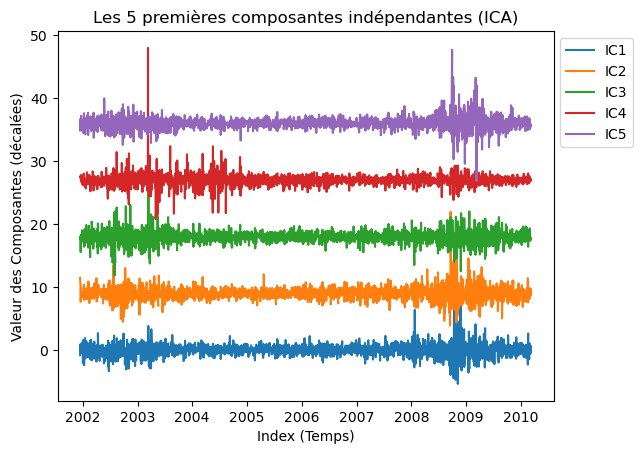

In [33]:

#plt.figure(figsize=(10, 6))
offset = 9  # Décalage vertical entre chaque courbe (ajuste selon besoin)

for i, col in enumerate(df_ICs.columns[:5]):  # Boucle sur les 5 premières colonnes
    plt.plot(df_ICs.index, df_ICs[col] + i * offset, label=col)  # Décalage progressif

plt.xlabel("Index (Temps)")
plt.ylabel("Valeur des Composantes (décalées)")
plt.title("Les 5 premières composantes indépendantes (ICA)")
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))  # Légende placée à droite
plt.show()


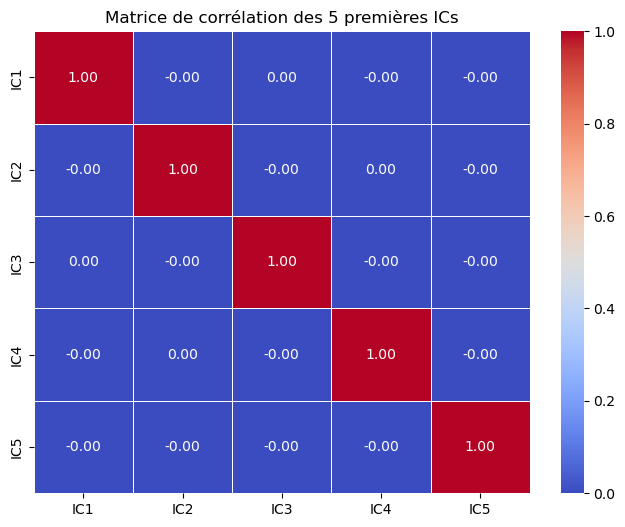

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sélection des 5 premières ICs
top_5_ICs = df_ICs.iloc[:, :5]

# Calcul de la matrice de corrélation
correlation_matrix = top_5_ICs.corr()

# Affichage de la matrice de corrélation avec heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Ajout des titres et labels
plt.title("Matrice de corrélation des 5 premières ICs")
plt.show()


On voit à tracers la matrice de corrélation que les composantes sont bien statistiquement indépendantes. 

### Calcul de la matrice de projection A permetant de retrouver les rendements à partir des composentes indépendantes

In [35]:
from numpy.linalg import inv

In [36]:
#A est juste l'inverse de la matrice W
A=inv(W)
A.shape

(38, 38)

In [37]:

#A1=A[[0]].T #on récupère la première ligne de A correspondant au CAC40
#WICs=((A1*(df.T)).T) #CIs pondérés


### Dans notre étude, on va s'interesser à l'action Total

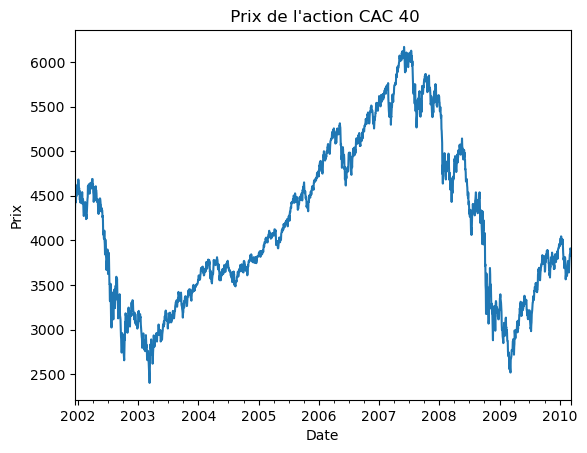

In [38]:
df["CAC 40"].plot()
plt.title(" Prix de l'action CAC 40")
plt.ylabel("Prix")
plt.show()

### Calcul des ICs pondérés par la composante dans A de Total

In [39]:

def compute_weighted_ICs(A: np.ndarray, ICs: pd.DataFrame, df_returns: pd.DataFrame, company_name: str, norm_type: str = "L∞"):
    """
    Calcule et trie les ICs pondérés pour une entreprise donnée.

    Paramètres :
    - A : np.ndarray - Matrice de mélange (mixing matrix) de taille (n_stocks, n_ICs).
    - ICs : pd.DataFrame - Matrice des composantes indépendantes (n_days, n_ICs).
    - df_returns : pd.DataFrame - DataFrame des rendements où chaque entreprise est une colonne.
    - company_name : str - Nom de la colonne de l'entreprise dans df_returns.
    - norm_type : str - Type de norme pour trier les ICs ("L∞", "L2", "L1").

    Retourne :
    - weighted_ICs_sorted : pd.DataFrame - DataFrame des ICs pondérés triés.
    """

    # Vérifier si l'entreprise est bien présente dans df_returns
    if company_name not in df_returns.columns:
        raise ValueError(f"L'entreprise '{company_name}' n'existe pas dans df_returns.")

    # Récupérer l'indice de la colonne correspondant à l'entreprise dans df_returns
    company_idx = df_returns.columns.get_loc(company_name)

    # Vérifier que l'indice est valide pour la matrice A
    if company_idx >= A.shape[0]:
        raise ValueError(f"L'indice récupéré ({company_idx}) dépasse la taille de la matrice A ({A.shape[0]}).")

    # Récupérer la ligne de la matrice A correspondant à l'entreprise
    company_weights = A[company_idx, :]  # Extraction sous forme de vecteur numpy

    # Calcul des ICs pondérés : multiplication élément par élément
    weighted_ICs = company_weights.T*ICs.T
    weighted_ICs=weighted_ICs.T
    # Calcul des normes pour chaque IC
    if norm_type == "Linf":
        norms = np.abs(weighted_ICs).max(axis=0)  # Norme max (valeur absolue max de chaque IC)
    elif norm_type == "L2":
        norms = np.sqrt((weighted_ICs ** 2).sum(axis=0))  # Norme Euclidienne
    elif norm_type == "L1":
        norms = np.abs(weighted_ICs).sum(axis=0)  # Norme de Manhattan (somme des valeurs absolues)
    else:
        raise ValueError("Norme non reconnue. Utiliser 'L∞', 'L2' ou 'L1'.")

    # Trier les ICs selon la norme choisie
    sorted_indices = norms.sort_values(ascending=False).index
    weighted_ICs_sorted = weighted_ICs[sorted_indices]

    return weighted_ICs_sorted


In [40]:

def compute_ICs(A: np.ndarray, ICs: pd.DataFrame, df_returns: pd.DataFrame, norm_type: str = "L∞"):
    """
    Calcule et trie les ICs  pour une entreprise donnée.

    Paramètres :
    - A : np.ndarray - Matrice de mélange (mixing matrix) de taille (n_stocks, n_ICs).
    - ICs : pd.DataFrame - Matrice des composantes indépendantes (n_days, n_ICs).
    - df_returns : pd.DataFrame - DataFrame des rendements où chaque entreprise est une colonne.
    - company_name : str - Nom de la colonne de l'entreprise dans df_returns.
    - norm_type : str - Type de norme pour trier les ICs ("L∞", "L2", "L1").

    Retourne :
    - weighted_ICs_sorted : pd.DataFrame - DataFrame des ICs  triés.
    """


    # Calcul des ICs  : multiplication élément par élément
    # Calcul des normes pour chaque IC
    if norm_type == "Linf":
        norms = np.abs(ICs).max(axis=0)  # Norme max (valeur absolue max de chaque IC)
    elif norm_type == "L2":
        norms = np.sqrt((ICs ** 2).sum(axis=0))  # Norme Euclidienne
    elif norm_type == "L1":
        norms = np.abs(ICs).sum(axis=0)  # Norme de Manhattan (somme des valeurs absolues)
    else:
        raise ValueError("Norme non reconnue. Utiliser 'L∞', 'L2' ou 'L1'.")

    # Trier les ICs selon la norme choisie
    sorted_indices = norms.sort_values(ascending=False).index
    ICs_sorted = ICs[sorted_indices]

    return ICs_sorted


In [41]:
IC_Weight_Total=compute_weighted_ICs(A=A, ICs=df_ICs , df_returns=returns, company_name ="CAC 40", norm_type='Linf')

In [42]:
ICs_sorted=compute_ICs(A=A, ICs=df_ICs , df_returns=returns, norm_type='Linf')

In [43]:
IC_Weight_Total.head()

,IC1,IC2,IC3,IC15,IC11,IC6,IC28,IC8,IC22,IC14,...,IC18,IC16,IC36,IC34,IC26,IC35,IC37,IC19,IC23,IC38
Date,,,,,,,,,,,,,,,,,,,,,
2001-12-14,-0.005397,0.013318,-0.001783,-2.991067e-04,-0.003509,-0.006284,-0.001118,-0.000055,-0.001878,0.000260,...,-0.002096,0.002385,-0.002126,-0.000948,-0.000127,-0.000308,-0.000794,0.000062,-2.073586e-05,-0.000010
2001-12-17,0.006498,0.006232,0.000092,6.322604e-04,0.004489,0.001625,0.002282,0.001679,0.005409,-0.006576,...,0.001044,-0.003769,0.000493,0.001369,0.000337,0.000492,0.000189,-0.000012,7.705167e-06,0.000023
2001-12-18,-0.000797,-0.007071,-0.013537,-5.753308e-07,0.004926,-0.000293,0.003337,0.000898,-0.002121,0.003288,...,-0.000213,0.000064,-0.000905,-0.001598,-0.000227,0.001134,-0.000032,-0.000133,-4.265734e-06,0.000059
2001-12-19,0.005525,-0.002968,0.001008,9.647970e-04,-0.001845,-0.003006,-0.001010,0.003353,0.002015,-0.000270,...,-0.000655,-0.000377,0.001189,-0.000638,0.000400,-0.001239,0.000356,0.000094,-6.080017e-07,-0.000054
2001-12-20,-0.002696,0.004259,-0.001760,4.782145e-03,-0.003868,-0.002637,0.000450,0.001226,-0.000441,-0.000769,...,-0.000420,0.001622,0.000521,0.000275,0.000807,-0.004459,-0.000401,0.000103,6.547817e-06,-0.000002


In [44]:
def plot_dominant_weighted_ICs(weighted_ICs_sorted: pd.DataFrame, top_n: int = 4):
    """
    Affiche les 4 ICs pondérés les plus dominants et la somme des ICs restants.

    Paramètres :
    - weighted_ICs_sorted : pd.DataFrame - Matrice des ICs pondérés DÉJÀ TRIÉE (temps x ICs).
    - top_n : int - Nombre d'ICs dominants à afficher (par défaut 4).

    Sortie :
    - Affiche un graphique des 4 ICs dominants + la somme des ICs restants.
    """

    # Sélection des top_n ICs dominants (les premières colonnes)
    dominant_ICs = weighted_ICs_sorted.iloc[:, :top_n]

    # Somme des ICs restants
    if weighted_ICs_sorted.shape[1] > top_n:
        remaining_ICs_sum = weighted_ICs_sorted.iloc[:, top_n:].sum(axis=1)
    else:
        remaining_ICs_sum = None  # Si on n'a pas d'autres ICs, on ne trace pas la somme

    # Création du graphique
    plt.figure(figsize=(10, 6))

    # Tracer les 4 ICs dominants avec un décalage vertical
    offset = 0.1  # Décalage vertical pour séparation
    for i, col in enumerate(dominant_ICs.columns):  # Inversion pour correspondre à l'affichage du papier
        plt.plot(weighted_ICs_sorted.index, dominant_ICs[col] + i * offset, label=f"Dominant {col}")

    # Tracer la somme des ICs restants si applicable
    if remaining_ICs_sum is not None:
        plt.plot(weighted_ICs_sorted.index, remaining_ICs_sum + top_n * offset,
                 label="Somme des ICs restantes", linestyle="dashed", color="black")

    # Labels et titre
    plt.xlabel("Jours")
    plt.ylabel("Composantes Indépendantes Pondérées")
    plt.title("Principales Composantes Indépendantes Pondérées et Somme des Composantes Restantes")
    plt.legend(loc="upper right")
    plt.show()


    return remaining_ICs_sum


In [45]:
def plot_dominant_ICs(ICs: pd.DataFrame, top_n: int = 4):
    """
    Affiche les 4 ICs non pondérés les plus dominants et la somme des ICs restants.

    Paramètres :
    - ICs : pd.DataFrame - Matrice des ICs DÉJÀ TRIÉE (temps x ICs).
    - top_n : int - Nombre d'ICs dominants à afficher (par défaut 4).

    Sortie :
    - Affiche un graphique des 4 ICs dominants + la somme des ICs restants.
    """

    # Sélection des top_n ICs dominants (les premières colonnes)
    dominant_ICs = ICs.iloc[:, :top_n]

    # Somme des ICs restants
    if ICs.shape[1] > top_n:
        remaining_ICs_sum = ICs.iloc[:, top_n:].sum(axis=1)
    else:
        remaining_ICs_sum = None  # Si on n'a pas d'autres ICs, on ne trace pas la somme

    # Création du graphique
    plt.figure(figsize=(10, 6))

    # Tracer les 4 ICs dominants avec un décalage vertical
    offset = 30  # Décalage vertical pour séparation
    for i, col in enumerate(dominant_ICs.columns):  # Inversion pour correspondre à l'affichage du papier
        plt.plot(ICs.index, dominant_ICs[col] + i * offset, label=f"Dominant {col}")

    # Tracer la somme des ICs restants si applicable
    if remaining_ICs_sum is not None:
        plt.plot(ICs.index, remaining_ICs_sum + top_n * offset,
                 label="Somme des ICs restantes", linestyle="dashed", color="black")
    # Labels et titre
    plt.xlabel("Jours")
    plt.ylabel("Composantes Indépendantes Pondérées")
    plt.title("Principales Composantes Indépendantes et Somme des Composantes Restantes")
    plt.legend(loc="upper right")
    plt.show()


    return remaining_ICs_sum


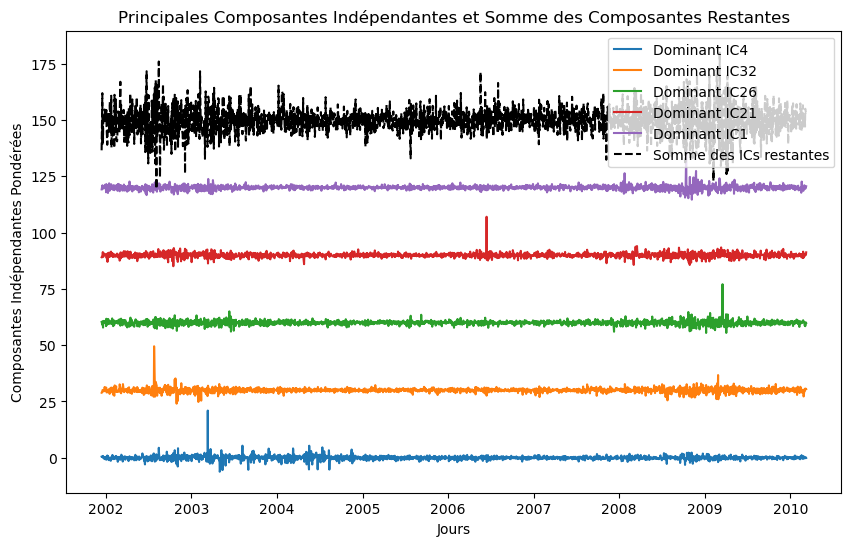

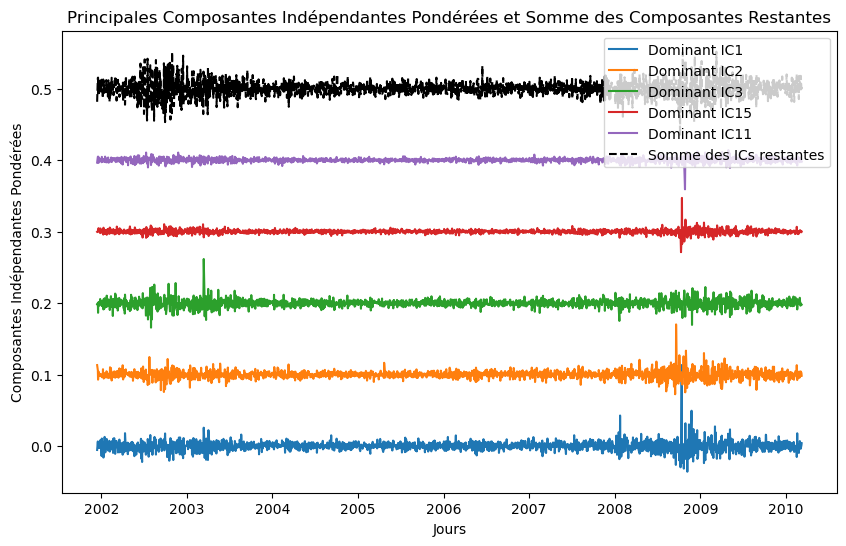

In [46]:
r_S= plot_dominant_ICs(ICs= ICs_sorted, top_n = 5)


r_S= plot_dominant_weighted_ICs(weighted_ICs_sorted= IC_Weight_Total, top_n = 5)



### 📌 **Analyse des Composantes Indépendantes Pondérées Dominantes**  

#### **1️⃣ Structure Générale**  
Le graphique présente les **composantes indépendantes les plus influentes après pondération**, ainsi que la **somme des composantes restantes** représentée par la courbe noire pointillée.  
- Chaque courbe colorée correspond à une **composante indépendante dominante**, qui contribue de manière significative aux rendements du marché.  
- La courbe noire illustre **l'impact cumulé des autres composantes**, généralement plus faibles et diffus.  

---

#### **2️⃣ Observations Clés**  

✅ **Un nombre restreint de composantes explique la majorité des variations**  
- Seules quelques composantes indépendantes dominent la structure du marché, confirmant que **les rendements des actions sont influencés par un petit nombre de facteurs sous-jacents**.  

✅ **Présence de pics de volatilité à certaines périodes**  
- Certaines composantes affichent des **variations soudaines**, en particulier autour de périodes de turbulence économique.  
- Ces pics peuvent être liés à des **crises financières, événements macroéconomiques ou chocs spécifiques sur le marché**.  

✅ **Les composantes secondaires ont un impact limité**  
- La **somme des autres composantes indépendantes (courbe noire)** reste relativement stable, indiquant que leur contribution globale est faible.  
- Cela suggère que **seules quelques composantes clés influencent réellement les rendements**, tandis que les autres jouent un rôle plus marginal.  

---

#### **3️⃣ Conclusion et Implications**  
📌 **L’analyse ICA permet d’extraire les facteurs dominants qui régissent les mouvements du marché.**  
📌 **Les événements de forte volatilité coïncident souvent avec des périodes de crise ou de transition économique.**  
📌 **En gestion des risques, ces résultats peuvent être exploités pour anticiper les chocs et améliorer les stratégies d’investissement.**  
en allocation d’actifs.**  
estion des risques.**  


In [47]:
def reconstruct_price(weighted_ICs_sorted: pd.DataFrame, df_prices: pd.DataFrame, company_name: str, top_n: int = 4):
    if company_name not in df_prices.columns:
        raise ValueError(f"L'entreprise '{company_name}' n'existe pas dans df_prices.")

    actual_price = df_prices[company_name]
    
    # Ajuster les tailles si nécessaire
    if len(weighted_ICs_sorted) < len(actual_price):
        actual_price = actual_price.iloc[-len(weighted_ICs_sorted):]

    dominant_ICs = weighted_ICs_sorted.iloc[:, :top_n]
    
    if weighted_ICs_sorted.shape[1] > top_n:
        remaining_ICs_sum = weighted_ICs_sorted.iloc[:, top_n:].sum(axis=1)
    else:
        remaining_ICs_sum = np.zeros_like(actual_price)

    initial_price = actual_price.iloc[0]

    reconstructed_price = initial_price * np.exp(np.cumsum(dominant_ICs.sum(axis=1)))
    residual_price = initial_price * np.exp(np.cumsum(remaining_ICs_sum))

    # S'assurer que les index sont alignés
    plt.figure(figsize=(10, 6))
    
    plt.plot(actual_price.index, actual_price, linestyle="dotted", label="Prix réel (ligne pointillée)")
    plt.plot(actual_price.index, reconstructed_price, linestyle="solid", label=f"Prix reconstruit (Top {top_n} ICs)")
    plt.plot(actual_price.index, residual_price, linestyle="dashed", label="Somme des ICs restantes")
    
    plt.xlabel("Jours")
    plt.ylabel("Valeur de l'indice")
    plt.title(f"Reconstruction du prix pour {company_name} (Log-returns)")
    plt.legend()
    plt.show()


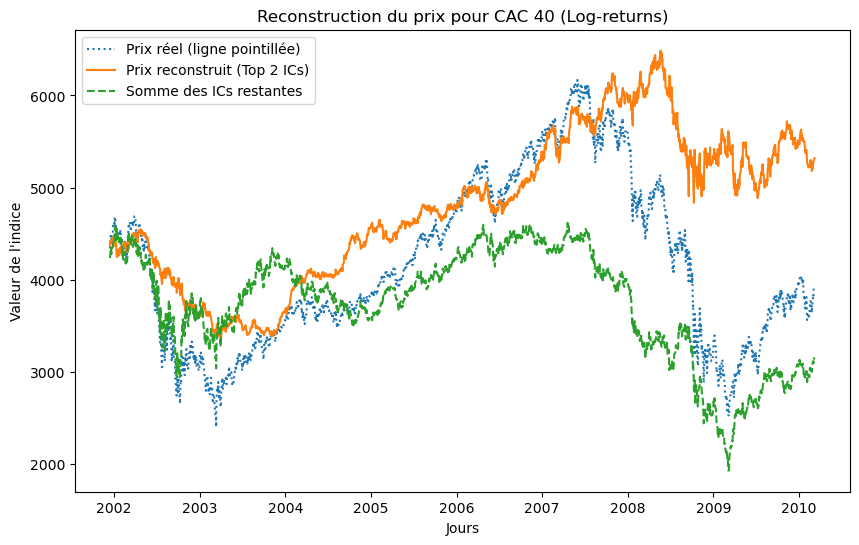

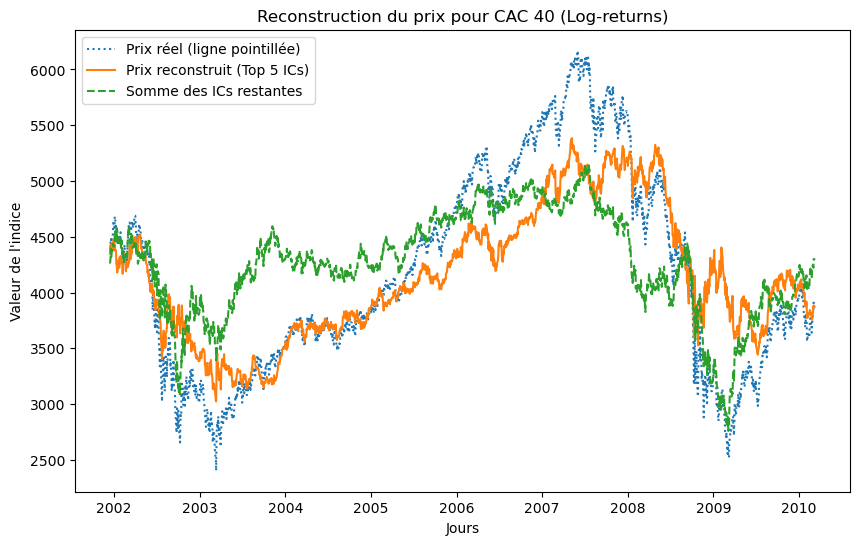

In [48]:

# Exécution de la fonction avec 7 ICs
df_rmse = reconstruct_price(weighted_ICs_sorted=IC_Weight_Total, df_prices=df, company_name='CAC 40', top_n=2)
df_rmse = reconstruct_price(weighted_ICs_sorted=IC_Weight_Total, df_prices=df, company_name='CAC 40', top_n=5)


In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def threshold_ICs(weighted_ICs_sorted: pd.DataFrame, threshold: float):
    """
    Applique un seuillage aux ICs pondérées : seules les valeurs supérieures à un seuil sont conservées.
    
    Paramètres :
    - weighted_ICs_sorted : pd.DataFrame - Matrice des ICs pondérées triées (temps x ICs).
    - threshold : float - Valeur du seuil (ex: 0.5). Les valeurs absolues inférieures à ce seuil sont mises à zéro.

    Retourne :
    - thresholded_ICs : pd.DataFrame - Matrice des ICs après seuillage.
    """
    thresholded_ICs = weighted_ICs_sorted.copy()
    thresholded_ICs[np.abs(thresholded_ICs) < threshold] = 0
    return thresholded_ICs


def reconstruct_price_thresholded(weighted_ICs_sorted: pd.DataFrame, df_prices: pd.DataFrame, company_name: str, top_n: int = 4, threshold: float = 0):
    """
    Reconstruit le prix d'une action via les log-rendements après seuillage des ICs.

    Paramètres :
    - weighted_ICs_sorted : pd.DataFrame - Matrice des ICs pondérées triées (temps x ICs).
    - df_prices : pd.DataFrame - DataFrame des prix réels des actions.
    - company_name : str - Nom de l'entreprise à reconstruire.
    - top_n : int - Nombre d'ICs dominantes à utiliser.
    - threshold : float - Seuil appliqué aux ICs (valeurs inférieures à |seuil| mises à zéro).

    Affiche :
    - Un graphique comparant le prix réel, le prix reconstruit avec les ICs dominantes seuillées et la somme des ICs restantes.
    """

    if company_name not in df_prices.columns:
        raise ValueError(f"L'entreprise '{company_name}' n'existe pas dans df_prices.")

    actual_price = df_prices[company_name]
    
    # Ajuster les tailles si nécessaire
    if len(weighted_ICs_sorted) < len(actual_price):
        actual_price = actual_price.iloc[-len(weighted_ICs_sorted):]

    # ICs dominantes (top_n) et restantes
    dominant_ICs = weighted_ICs_sorted.iloc[:, :top_n].copy()
    remaining_ICs = weighted_ICs_sorted.iloc[:, top_n:].copy() if weighted_ICs_sorted.shape[1] > top_n else pd.DataFrame(0, index=weighted_ICs_sorted.index, columns=[])

    # Application du seuillage
    dominant_ICs[np.abs(dominant_ICs) < threshold] = 0
    remaining_ICs[np.abs(remaining_ICs) < threshold] = 0

    # Reconstruction des log-rendements
    dominant_log_returns = dominant_ICs.sum(axis=1)
    remaining_log_returns = remaining_ICs.sum(axis=1) if not remaining_ICs.empty else np.zeros_like(dominant_log_returns)

    initial_price = actual_price.iloc[0]

    # Reconstruction des prix via les log-rendements cumulés
    reconstructed_price = initial_price * np.exp(np.cumsum(dominant_log_returns))
    residual_price = initial_price * np.exp(np.cumsum(remaining_log_returns))

    # --- Graphique des prix reconstruits ---
    plt.figure(figsize=(10, 6))
    plt.plot(actual_price.index, actual_price, linestyle="dotted", label="Valeur réelle (ligne pointillée)")
    plt.plot(actual_price.index, reconstructed_price, linestyle="solid", label=f"Prix reconstruit (Top {top_n} ICs seuillées, seuil={threshold})")
    
    plt.xlabel("Jours")
    plt.ylabel("Valeur de l'indice")
    plt.title(f"Reconstruction du prix pour {company_name} avec seuillage")
    plt.legend()
    plt.show()

    # --- Graphique des log-rendements reconstruits ---
    plt.figure(figsize=(10, 6))
    plt.plot(dominant_log_returns, label=f"Log-rendements dominants (seuil={threshold})")
    
    plt.xlabel("Jours")
    plt.ylabel("Log-rendements")
    plt.title(f"Reconstruction des log-rendements pour {company_name}")
    plt.legend()
    plt.show()



## seuil 0.05

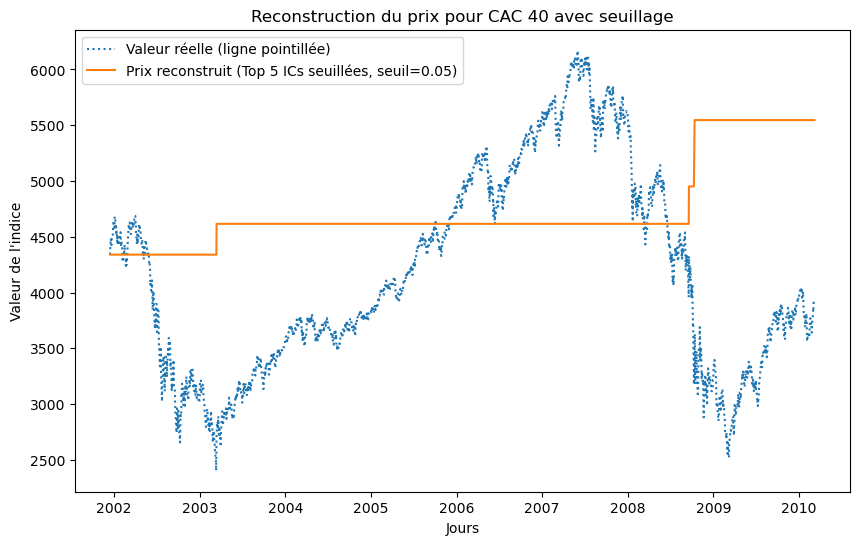

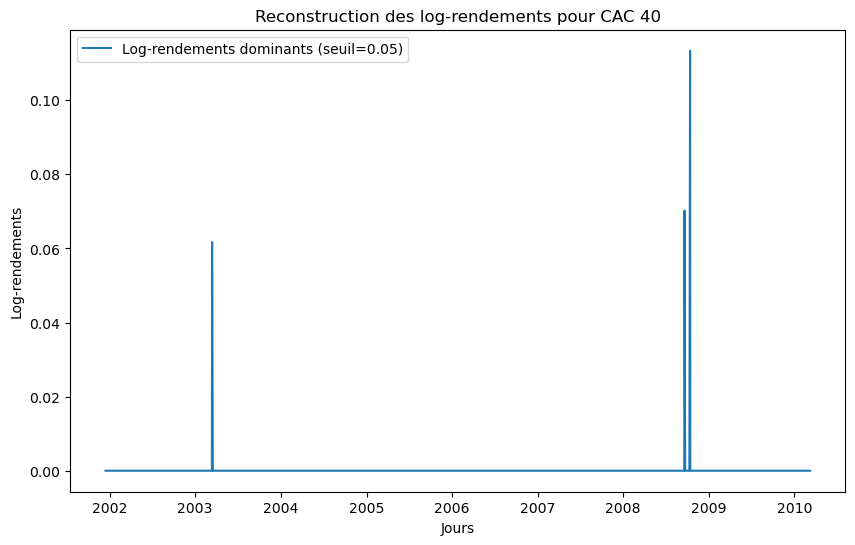

In [50]:
reconstruct_price_thresholded(weighted_ICs_sorted= IC_Weight_Total, df_prices= df, company_name= "CAC 40", top_n = 5, threshold = 0.05)

## Seuil 0.01

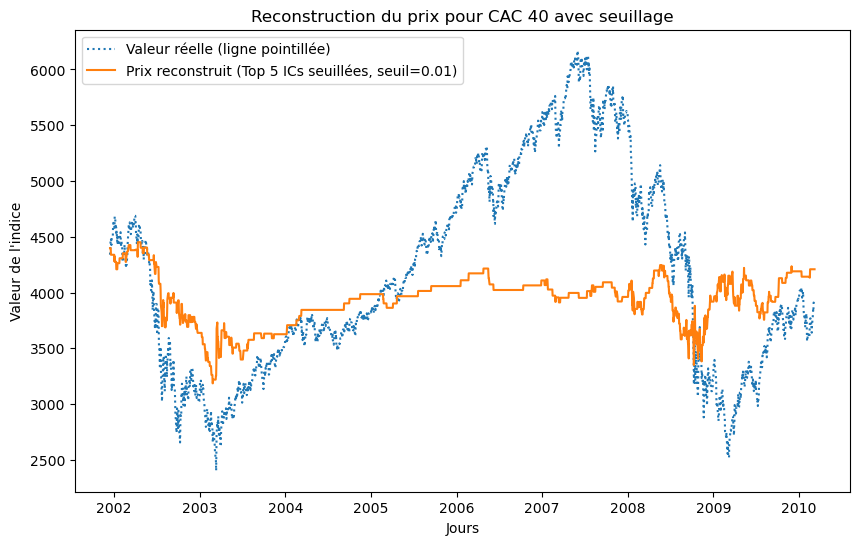

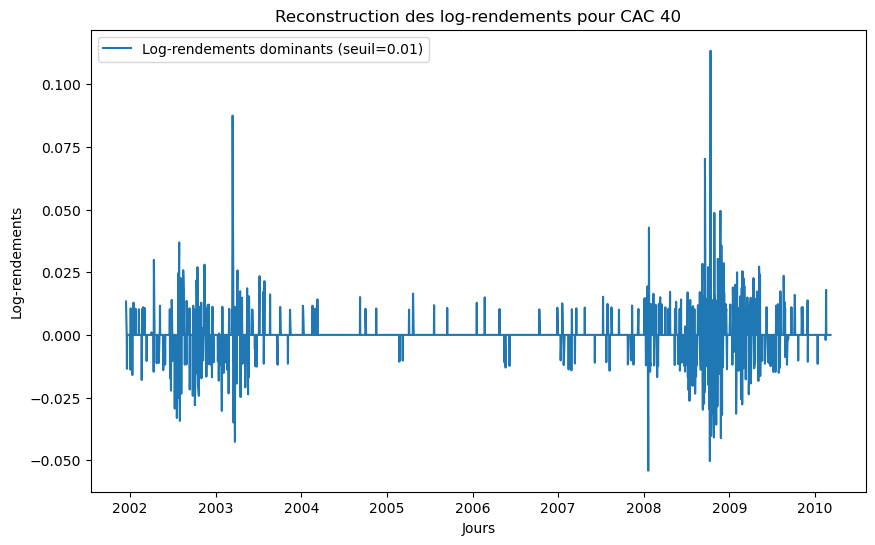

In [51]:
reconstruct_price_thresholded(weighted_ICs_sorted= IC_Weight_Total, df_prices= df, company_name= "CAC 40", top_n = 5, threshold = 0.01)

## Seuil 0.001

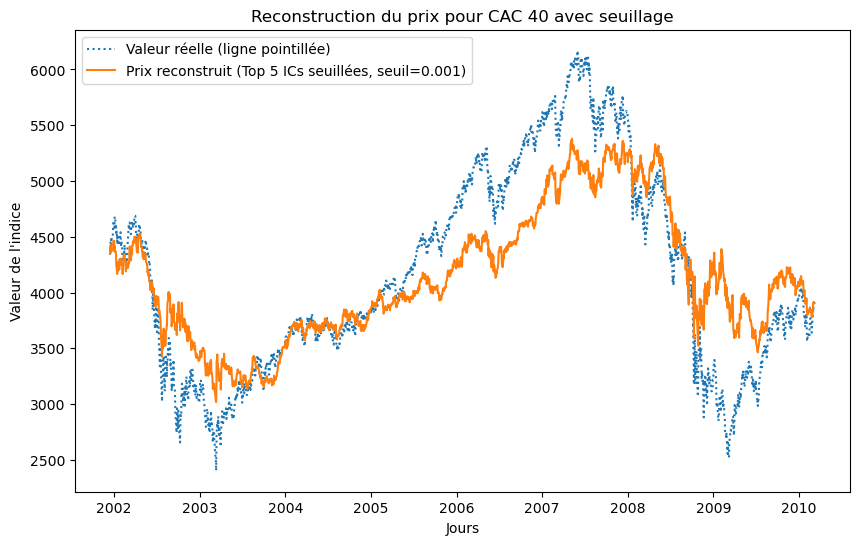

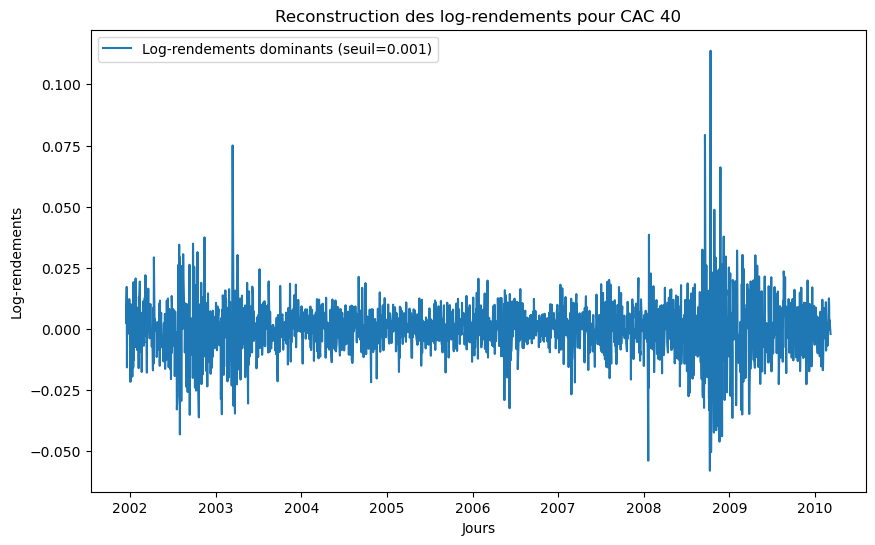

In [52]:
reconstruct_price_thresholded(weighted_ICs_sorted= IC_Weight_Total, df_prices= df, company_name= "CAC 40", top_n = 5, threshold = 0.001)


# PCA (Sans seuillage)

In [53]:

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

def perform_pca(df_returns: pd.DataFrame):
    """
    Effectue une PCA sur les rendements et retourne les résultats.

    Paramètres :
    - df_returns : pd.DataFrame - Matrice des rendements (jours x entreprises).
    - n_components : int - Nombre de PCs à extraire.

    Retourne :
    
    - df_pca : pd.DataFrame - Projection des rendements sur toutes les PCs.
    - pca : Objet PCA entraîné.
    - explained_variance_ratio : Variance expliquée par chaque PC.
    - scaler : StandardScaler entraîné sur les rendements.
    - feature_names : Liste des noms des entreprises (features) utilisées.
    
    """
    # Normalisation des rendements (centrage-réduction)
    scaler = StandardScaler()
    returns_scaled = scaler.fit_transform(df_returns)

    # PCA complète (on extrait toutes les composantes)
    pca = PCA(n_components=df_returns.shape[1])
    principal_components = pca.fit_transform(returns_scaled)

    # Explication de la variance
    explained_variance_ratio = pca.explained_variance_ratio_

    # Graphique : Variance expliquée
    # plt.figure(figsize=(8, 5))
    # plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio * 100, alpha=0.75, color='b')
    # plt.xlabel('Composantes principales')
    # plt.ylabel('Variance expliquée (%)')
    # plt.title('Variance expliquée par chaque composante principale')
    # plt.show()

    # Création du DataFrame des PCs
    df_pca = pd.DataFrame(principal_components, index=df_returns.index, columns=[f"PC{i+1}" for i in range(df_returns.shape[1])])

    return df_pca, pca, explained_variance_ratio, scaler, df_returns.columns  # On retourne aussi les noms des colonnes


def reconstruct_pca(df_pca: pd.DataFrame, pca: PCA, scaler: StandardScaler, df_prices: pd.DataFrame, company_name: str, top_n: int):
    """
    Reconstruit les rendements et les prix des actions après PCA et affiche les reconstructions.

    Paramètres :
    - df_pca : pd.DataFrame - Projection des rendements sur les PCs.
    - pca : Objet PCA entraîné.
    - scaler : StandardScaler entraîné sur les rendements.
    - df_prices : pd.DataFrame - Prix réels des actions.
    - company_name : str - Nom de l'entreprise.
    - top_n : int - Nombre de PCs dominantes à utiliser.

    Sortie :
    - Graphiques des prix réels vs reconstruits avec et sans PCs dominantes.
    - Graphiques des rendements reconstruits.
    """

    # Vérifier si l'entreprise est bien présente
    if company_name not in df_prices.columns:
        raise ValueError(f"L'entreprise '{company_name}' n'existe pas dans df_prices.")

    # Sélection des top_n PCs et des restantes
    pcs_top = df_pca.iloc[:, :top_n]  # Les PCs les plus importantes
    pcs_remaining = df_pca.iloc[:, top_n:]  # Les autres PCs

    # Matrices de projection
    components_top = pca.components_[:top_n, :]  # Matrice des PCs dominantes
    # if top_n < df_pca.shape[1]:  # Vérifier s'il reste des PCs après top_n
    #     components_remaining = pca.components_[top_n:, :]
    # else:
    #     components_remaining = np.zeros((0, pca.components_.shape[1]))  # Si aucune composante restante

    # Reconstruction des rendements
    reconstructed_returns_top = np.dot(pcs_top, components_top)  # Reconstruction avec les PCs dominantes

    # Dé-normalisation
    reconstructed_returns_top = scaler.inverse_transform(reconstructed_returns_top)

    # Conversion en DataFrame
    df_reconstructed_top = pd.DataFrame(reconstructed_returns_top, index=df_pca.index, columns=df_prices.columns)

    # Sélectionner le prix réel

    actual_price = df_prices[company_name]

    # Reconstruction du prix par sommation cumulative
    #reconstructed_price_top = np.cumsum(df_reconstructed_top[company_name]) + actual_price.iloc[0]


    
    # # Application du seuillage
    # dominant_ICs[np.abs(dominant_ICs) < threshold] = 0
    # remaining_ICs[np.abs(remaining_ICs) < threshold] = 0

    # # Reconstruction des log-rendements
    # dominant_log_returns = dominant_ICs.sum(axis=1)
    # remaining_log_returns = remaining_ICs.sum(axis=1) if not remaining_ICs.empty else np.zeros_like(dominant_log_returns)

    initial_price = actual_price.iloc[0]

    # Reconstruction des prix via les log-rendements cumulés
    reconstructed_price_top = initial_price * np.exp(np.cumsum(df_reconstructed_top[company_name]))
    
    
    
    
    # Tracé des prix reconstruits

    plt.figure(figsize=(10, 6))
    plt.plot(actual_price.index, actual_price, linestyle="dotted", label="Prix réel")
    plt.plot(reconstructed_price_top.index, reconstructed_price_top, linestyle="solid", label=f"Prix reconstruit (Top {top_n} PCs)")
    plt.xlabel("Jours")
    plt.ylabel("Valeur de l'indice")
    plt.title(f"Reconstruction du prix pour {company_name} après PCA")
    plt.legend()
    plt.show()

    # Tracé des rendements reconstruits
    plt.figure(figsize=(10, 5))
    plt.plot(df_reconstructed_top[company_name], linestyle="solid", label=f"Rendements reconstruits (Top {top_n} PCs)")
    plt.xlabel("Jours")
    plt.ylabel("Log-Rendements")
    plt.title(f"Reconstruction des rendements pour {company_name} après PCA")
    plt.legend()
    plt.show()


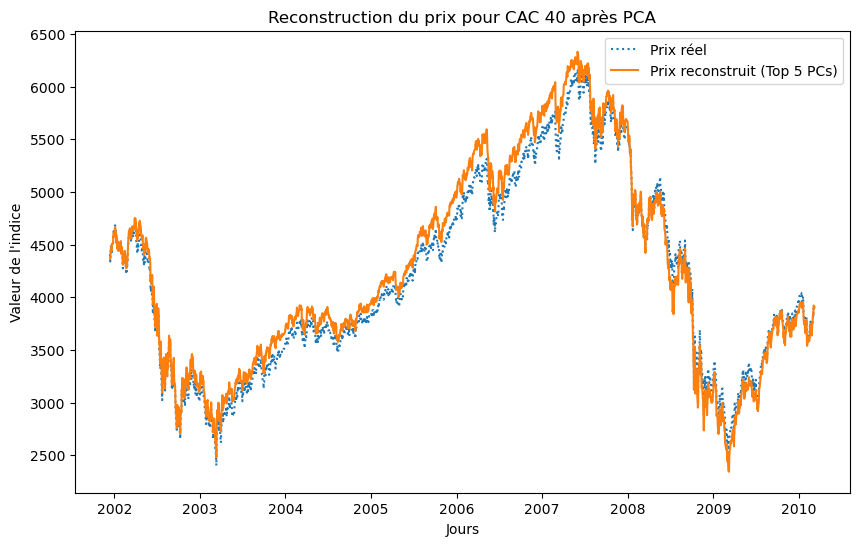

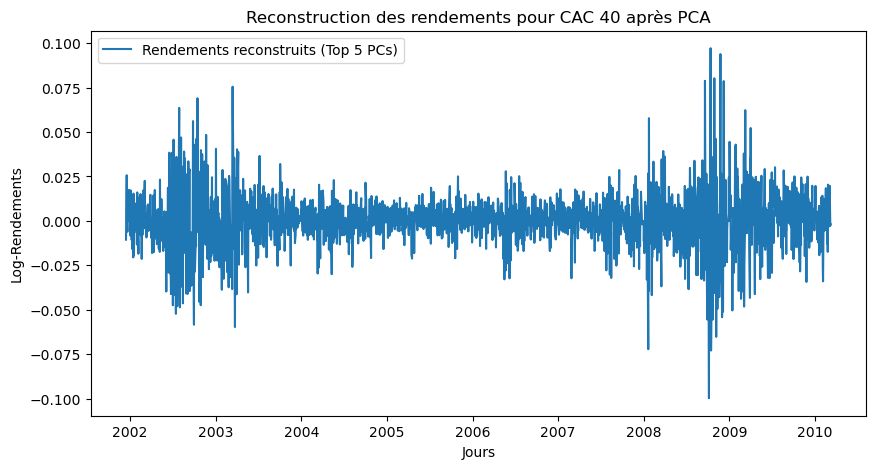

In [54]:
# Étape 1 : Effectuer la PCA
df_pca, pca_model, explained_variance, scaler_pca, feature_names = perform_pca(returns)

# Étape 2 : Reconstruction des prix et rendements avec les PCs dominantes et restantes
reconstruct_pca(df_pca, pca_model, scaler_pca, df, "CAC 40", top_n=5)


# PCA avec seuillage 

In [55]:

def threshold_and_reconstruct_pca(df_pca: pd.DataFrame, pca: PCA, scaler: StandardScaler, df_prices: pd.DataFrame, company_name: str, top_n: int, threshold: float):
    """
    Applique un seuillage sur les PCs dominantes, reconstruit les rendements et les prix des actions après PCA, 
    et affiche les reconstructions.

    Paramètres :
    - df_pca : pd.DataFrame - Projection des rendements sur les PCs.
    - pca : Objet PCA entraîné.
    - scaler : StandardScaler entraîné sur les rendements.
    - df_prices : pd.DataFrame - Prix réels des actions.
    - company_name : str - Nom de l'entreprise.
    - top_n : int - Nombre de PCs dominantes à utiliser.
    - threshold : float - Seuil pour supprimer les petites valeurs.

    Sortie :
    - Graphiques des prix réels vs reconstruits après seuillage.
    - Graphique des rendements reconstruits après seuillage.
    """

    # Vérifier si l'entreprise est bien présente
    if company_name not in df_prices.columns:
        raise ValueError(f"L'entreprise '{company_name}' n'existe pas dans df_prices.")

    # Seuillage des PCs dominantes
    df_pca_thresholded = df_pca.copy()
    df_pca_thresholded[np.abs(df_pca_thresholded) < threshold] = 0  # Appliquer le seuillage

    # Sélection des PCs seuillées
    pcs_top = df_pca_thresholded.iloc[:, :top_n]  # Les PCs les plus importantes après seuillage

    # Matrice de projection des PCs dominantes
    components_top = pca.components_[:top_n, :]  # Matrice des PCs dominantes

    # Reconstruction des rendements après seuillage
    reconstructed_returns_top = np.dot(pcs_top, components_top)

    # Dé-normalisation des rendements
    reconstructed_returns_top = scaler.inverse_transform(reconstructed_returns_top)

    # Conversion en DataFrame
    df_reconstructed_top = pd.DataFrame(reconstructed_returns_top, index=df_pca.index, columns=df_prices.columns)

    # Sélectionner le prix réel
    actual_price = df_prices[company_name]

    # Reconstruction du prix par sommation cumulative
    initial_price = actual_price.iloc[0]

    reconstructed_price_top = initial_price * np.exp(np.cumsum(df_reconstructed_top[company_name]))
    
    # Tracé des prix reconstruits après seuillage
    plt.figure(figsize=(10, 6))
    plt.plot(actual_price.index, actual_price, linestyle="dotted", label="Valeur réelle")
    plt.plot(reconstructed_price_top.index, reconstructed_price_top, linestyle="solid", label=f"Prix reconstruit (Top {top_n} PCs après seuillage, seuil={threshold})")
    plt.xlabel("Jours")
    plt.ylabel("Valeur de l'indice")
    plt.title(f"Reconstruction du prix pour {company_name} après PCA (Seuillage)")
    plt.legend()
    plt.show()

    # Tracé des rendements reconstruits après seuillage
    plt.figure(figsize=(10, 5))
    plt.plot(df_reconstructed_top[company_name], linestyle="solid", label=f"Rendements reconstruits (Top {top_n} PCs après seuillage, seuil={threshold})")
    plt.xlabel("Jours")
    plt.ylabel("Log-Rendements")
    plt.title(f"Reconstruction des rendements pour {company_name} après PCA (Seuillage)")
    plt.legend()
    plt.show()

    return df_pca_thresholded, df_reconstructed_top


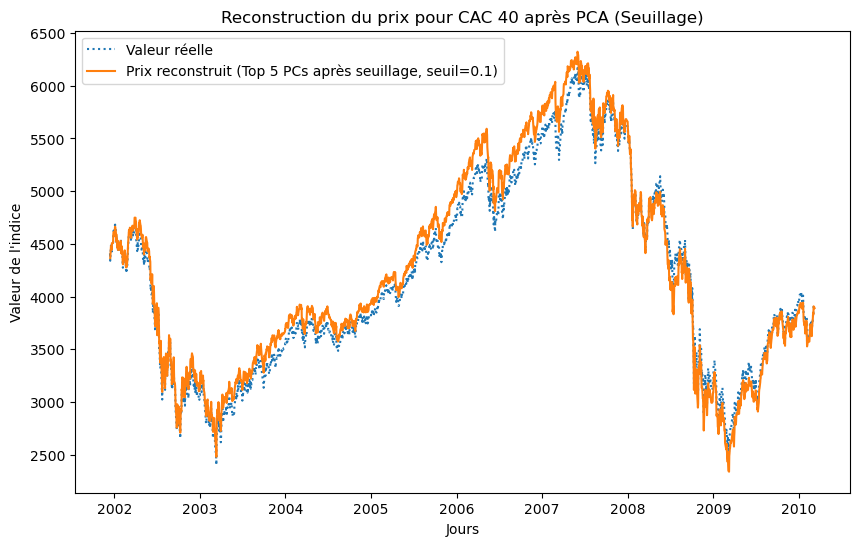

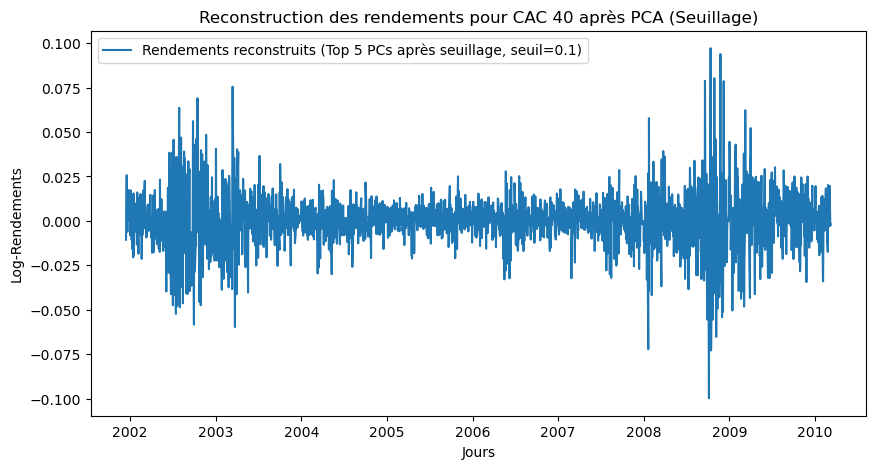

In [56]:
# Étape 1 : Effectuer la PCA
df_pca, pca_model, explained_variance, scaler_pca, feature_names = perform_pca(returns)

# Étape 2 : Seuillage et reconstruction des prix/rendements
df_pca_thresholded, df_reconstructed_pca_ts = threshold_and_reconstruct_pca(
    df_pca, pca_model, scaler_pca, df, company_name="CAC 40", top_n=5, threshold=0.1
)
